# Task 2

---

## INSIGHTS

This Jupyter notebook includes some code to generate insights on what we learnt from the data. We will use a package called `NLTK` to perform sentiment analysis.

### GRAPHS AND PLOTS
We will then use a package called `matplotlib` to perform plot charts and graphs

In [29]:
print("hello")
import nltk
print("you are successful")

hello
you are successful


In [30]:
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [31]:
# Read in the reviews data from a CSV file
sentiment_analysis_df = pd.read_csv(r"C:\Jahnavi\PythonProjects\ProjSentimentAnalysis\Sentiment-Analysis-main\Datasets\sentiment_content - Copy.csv")

In [32]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jneel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
sentiment_analysis_df['SENTIMENT'] = sentiment_analysis_df['CONTENT'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,CONTENT,Unnamed: 1,SENTIMENT
0,Jahnavi you had awesome service,NaN,0.6249
1,srinu you are worst,NaN,-0.6249
2,excellent ser,ervice,0.5719
3,stpid service,NaN,0.0000


In [34]:
# Creating another new column called 'SENTIMENT_TYPE' that contains the type of sentiment of each review using nltk
# for each sentiment score in the 'SENTIMENT' column
sentiment_analysis_df['SENTIMENT_TYPE'] = sentiment_analysis_df['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,CONTENT,Unnamed: 1,SENTIMENT,SENTIMENT_TYPE
0,Jahnavi you had awesome service,NaN,0.6249,positive
1,srinu you are worst,NaN,-0.6249,negative
2,excellent ser,ervice,0.5719,positive
3,stpid service,NaN,0.0000,neutral


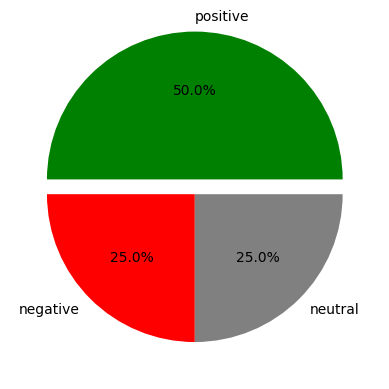

In [35]:
# calculate the percentage of each type of sentiment score
sentiment_type_percentages = sentiment_analysis_df['SENTIMENT_TYPE'].value_counts(normalize=True) * 100

# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

## Sentiment
Out of 2000 reviews, 1096 were positive, 898 were negative and 
6 were neutral. This means the majority of reviews were 
polarised as either positive or negative

In [37]:
#Saving the new data into a csv
sentiment_analysis_df.to_csv(r"C:\Jahnavi\PythonProjects\ProjSentimentAnalysis\Sentiment-Analysis-main\Datasets\Cleaned_BA_reviews1.csv")

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jneel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

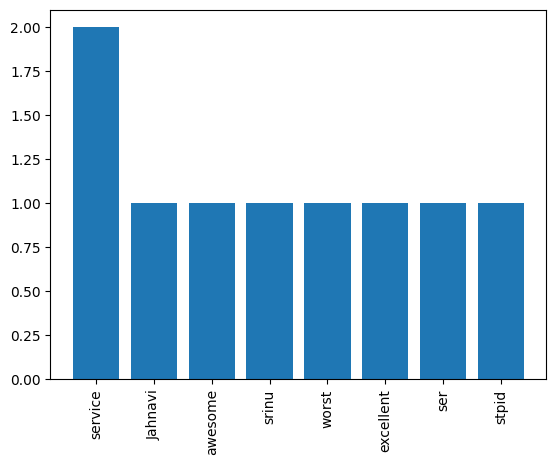

In [39]:
# The frequency chart shows the key topics within the 
# reviews showing what people are actively talking about their experience and staff

# Get the reviews from the dataframe
reviews = sentiment_analysis_df['CONTENT']

# Convert the reviews to a list of words
words = []
for review in reviews:
    words.extend(review.split())

# Filter out the stubborn stop words that don't want to disappear
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word not in ['I', 'The','would','one','get','-']]

# Get the top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Filter out the stop words 
filtered_words = [
    (word, count) for word, count in top_20_words if word not in stopwords and word not in ['I', 'The','would','one','get','-']
    ]

# Get the labels and values for the histogram
labels, values = zip(*top_20_words)

# Create the histogram
plt.bar(labels, values)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

## Key topics
The frequency chart below shows that the key topics within the reviews include “flight”, “London”, “service” and “crew”, showing that 
people are actively talking about their experience and staff

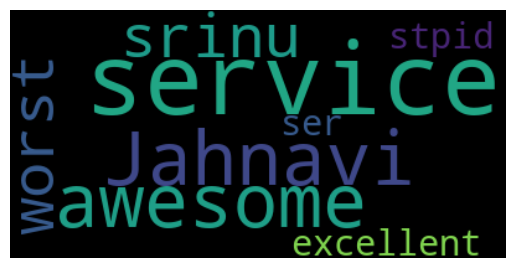

In [40]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Create the wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['CONTENT']))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

## Key topics
The word cloud also showed similar words and key topics within the reviews. This includes “flight”, “BA”, “seat” and “time”, showing that
people are actively talking about their experience and staff